In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [4]:
#read data from github link
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### As we need to predict cost ie charges, so the charges column will be our Label

### EDA

In [5]:
data.shape

(1338, 7)

##### Rows - 1338 and columns - 7

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Observations:
age - continious data ,
sex - descrete data ,
bmi - continious data ,
children - descrete data ,
smoker - descrete data ,
region - descrete data ,
charges - continious data

##### float - 2 columns   ,    int - 2 columns    ,    object - 3 columns


#### seems to be NO Null values

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### OBSERVATION : All object dtype columns are checked for value counts and found to be having NO BLANK / NO NULL values, Hence No NULL values in the data

### Encoder for treating object data

In [11]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
data.shape

(1338, 7)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df = lab_enc.fit_transform(data['sex'])
pd.Series(df)
data['sex']=df

df = lab_enc.fit_transform(data['region'])
pd.Series(df)
data['region']=df

df = lab_enc.fit_transform(data['smoker'])
pd.Series(df)
data['smoker']=df
data['sex']=data['sex'].astype(float)
data['age']=data['age'].astype(float)
data['children']=data['children'].astype(float)
data['region']=data['region'].astype(float)
data['smoker']=data['smoker'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(7)
memory usage: 73.3 KB


In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520


In [15]:
'''oe=OrdinalEncoder(categories = [['female','male'],['no','yes'],['northeast','northwest','southeast','southwest']])

data_OE=pd.DataFrame(oe.fit_transform(data[['sex','smoker','region']]), columns=[['sex','smoker','region']])

data_OE.head()

data.sex=data_OE.sex
data.region=data_OE.region
data.smoker=data_OE.smoker
data.info()'''

"oe=OrdinalEncoder(categories = [['female','male'],['no','yes'],['northeast','northwest','southeast','southwest']])\n\ndata_OE=pd.DataFrame(oe.fit_transform(data[['sex','smoker','region']]), columns=[['sex','smoker','region']])\n\ndata_OE.head()\n\ndata.sex=data_OE.sex\ndata.region=data_OE.region\ndata.smoker=data_OE.smoker\ndata.info()"

In [16]:
data.sex.value_counts()

1.0    676
0.0    662
Name: sex, dtype: int64

In [17]:
data.region.value_counts()

2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64

In [18]:
data.smoker.value_counts()

0.0    1064
1.0     274
Name: smoker, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(7)
memory usage: 73.3 KB


##### all our columns are now converted to float64 dtypes

#### so we having completed the Encoding part

### EDO continue

In [20]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### Observation : we have 'age' and 'bmi' as continious data, hence we will be looking on basis stats for these two columns only

##### mean and 50% for both the columns are almost equal so data seems to be distributed on mean

##### there is no such big variation between min, Q1, Q2, Q3 and max, Std is also OK

#### Check for data distribution

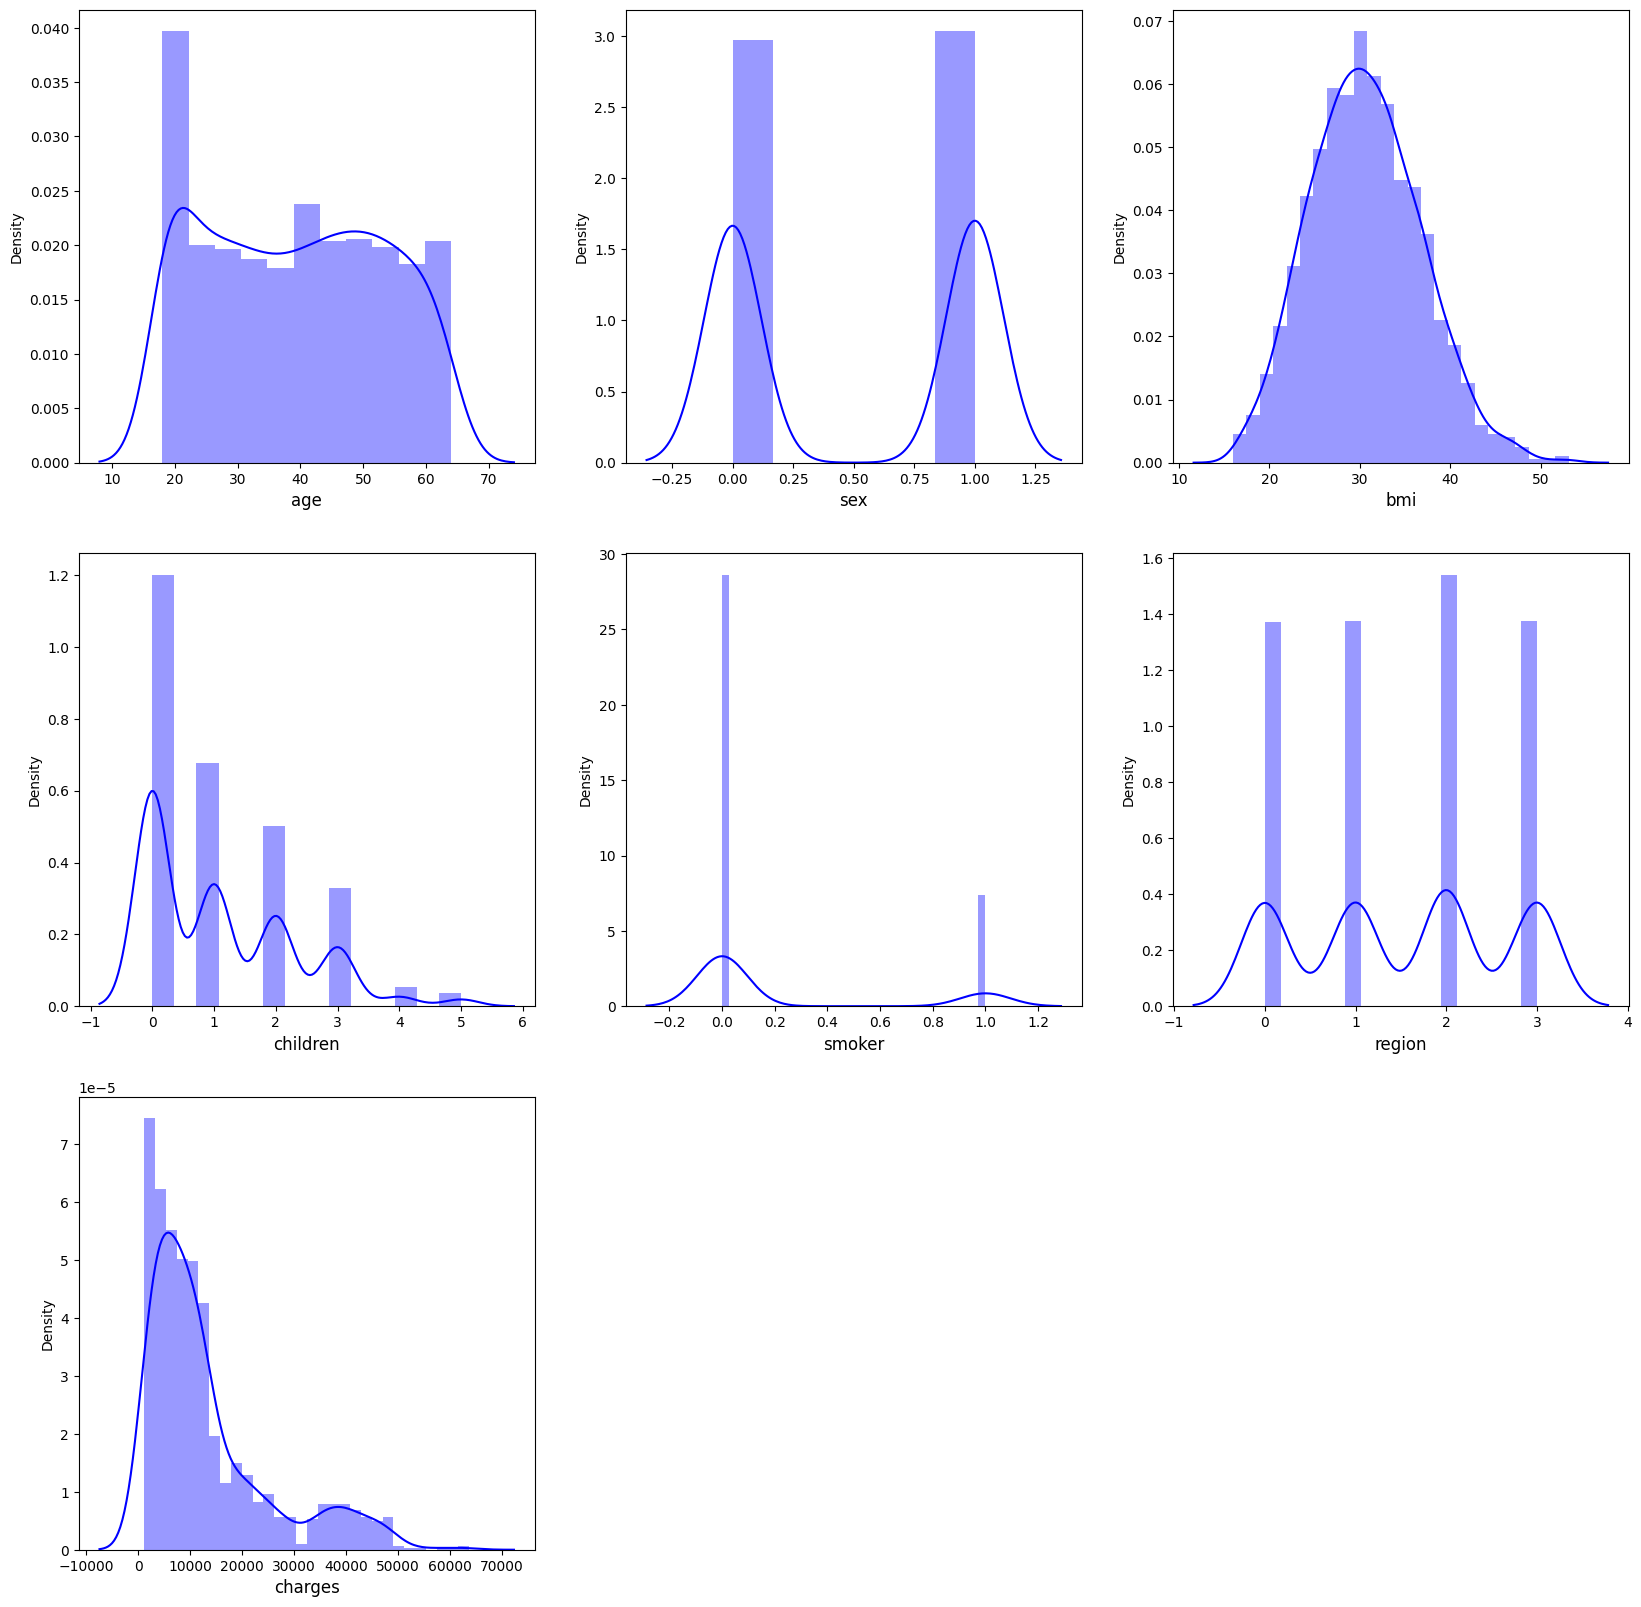

In [21]:
plt.figure(figsize=(20,20))
plotno=1
for column in data:
    if plotno<=7:
        plt.subplot(3,3,plotno)
        sns.distplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    plotno +=1
plt.show()

#### Data seems to be normally distributed for continious columns

#### Check for skewness

In [22]:
for column in data:
    print(column, "  :   ", data[column].skew())

age   :    0.05567251565299186
sex   :    -0.02095139743334541
bmi   :    0.2840471105987448
children   :    0.9383804401702414
smoker   :    1.4647661601953743
region   :    -0.038100508026419524
charges   :    1.5158796580240388


#### 'smoker' & 'children' column seems to be have skewness but as both the columns are having categorical data so we will keep it as it is

#### Check for Outliers

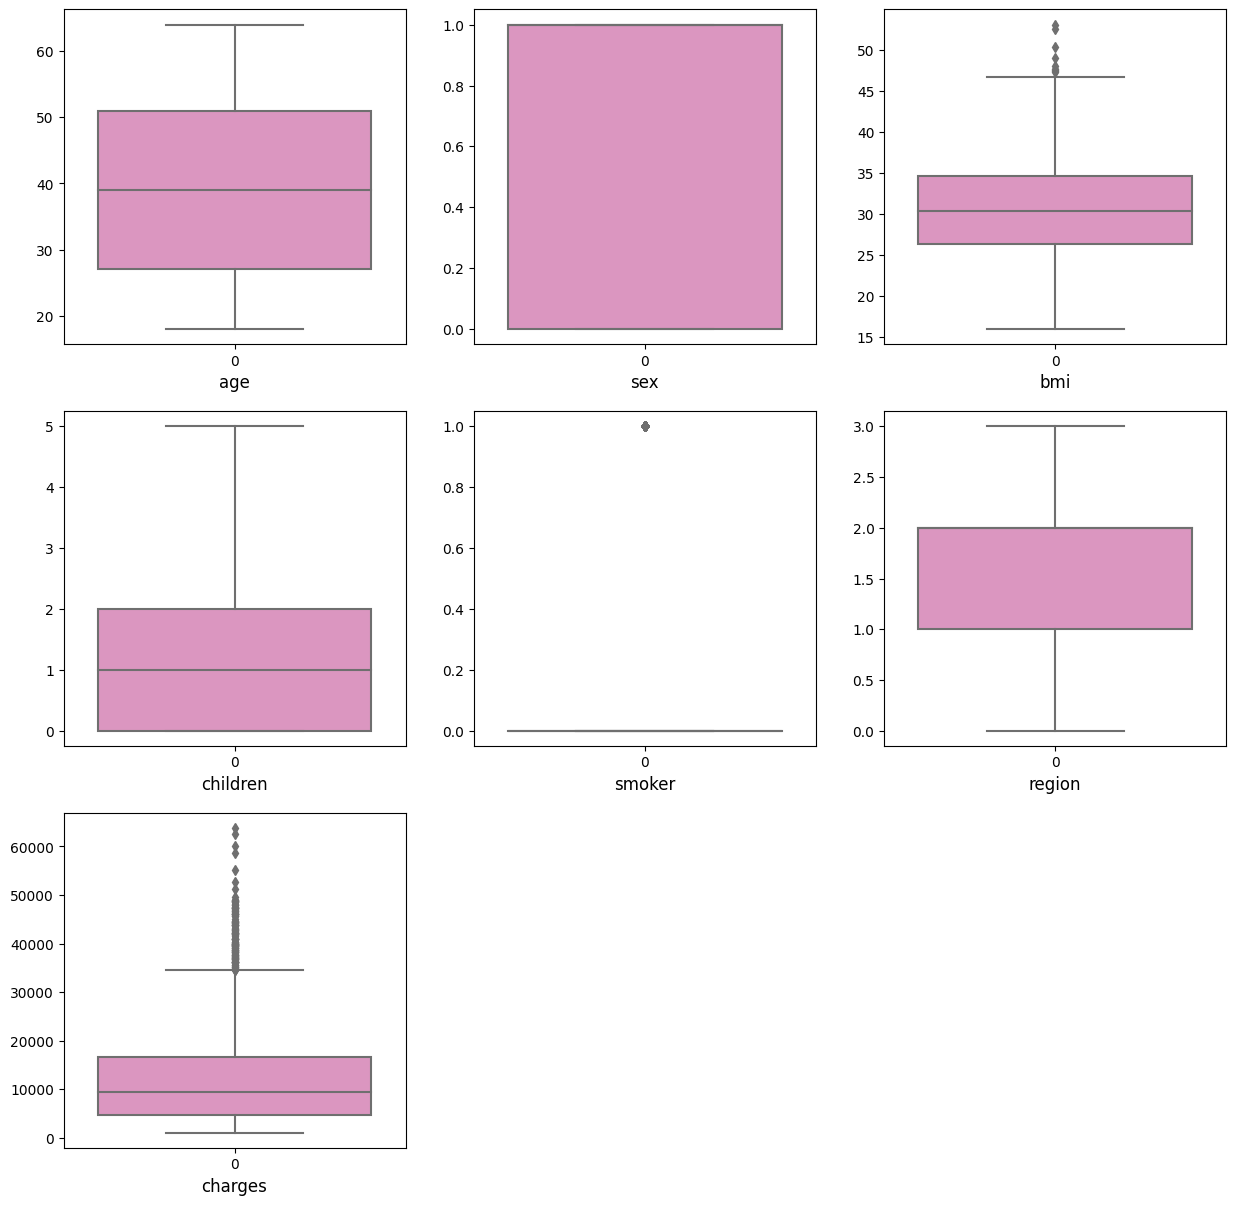

In [23]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=7:
        plt.subplot(4,3,pltno)
        sns.boxplot(data[column], color='red', palette='Set2_r')
        plt.xlabel(column,fontsize=12)
    pltno+=1
plt.show()

#### BMI is showing outliers

In [24]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [25]:
bmi_high=(q3.bmi+(1.5*iqr.bmi))
bmi_high

47.290000000000006

In [26]:
np_index=np.where(data['bmi']>bmi_high)
np_index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),)

In [27]:
data=data.drop(data.index[np_index])
data.reset_index()
data.shape

(1329, 7)

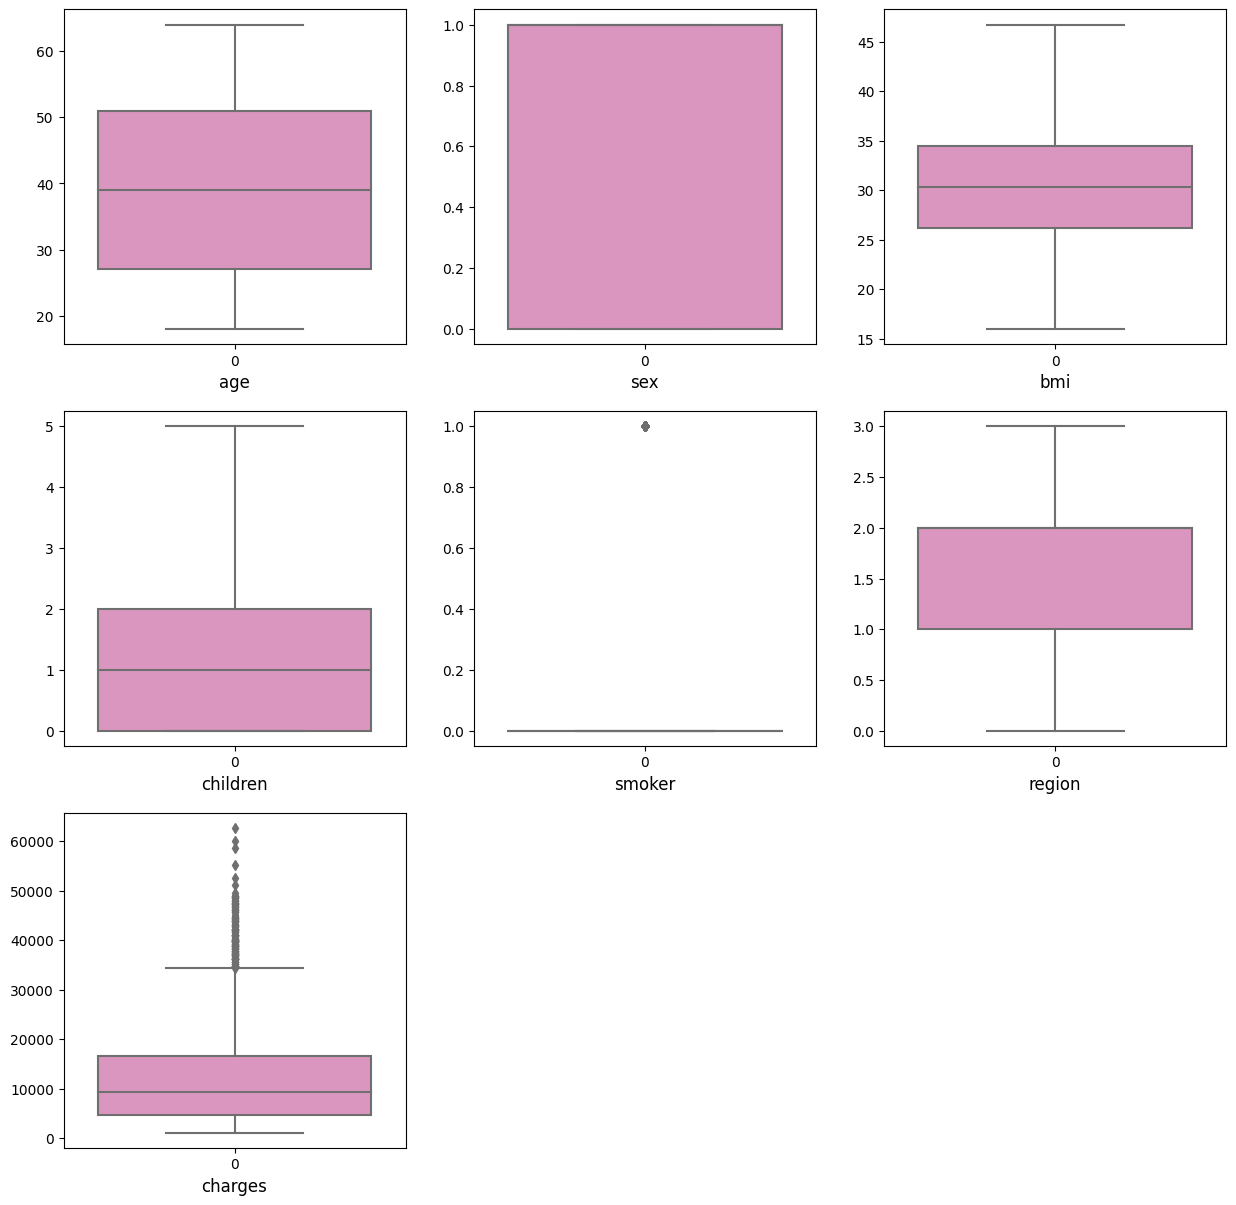

In [28]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=7:
        plt.subplot(4,3,pltno)
        sns.boxplot(data[column], color='red', palette='Set2_r')
        plt.xlabel(column,fontsize=12)
    pltno+=1
plt.show()

In [29]:
#### # Now BMI column is not showing outliers

#### CHECK FOR : Multi Colinearity

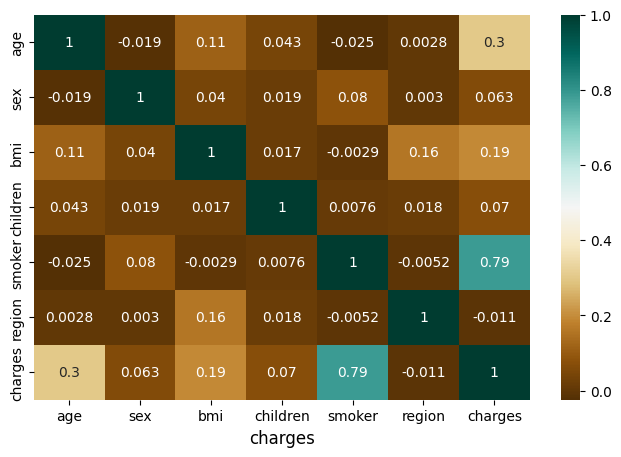

In [30]:
cor=data.corr()
plt.figure(figsize=(8,5))

sns.heatmap(data=cor, annot=True, cmap='BrBG')
plt.xlabel(column, fontsize=12)
plt.show()


##### No such Multi colinearity seen by heat map

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()



x=data.drop(['charges', 'region'], axis=1)
y=data['charges']
x1=scaler.fit_transform(x)
#x1=pd.DataFrame(x1, columns=x.columns)
#x1
x1.shape[1]
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x1, i) for i in range(x1.shape[1])]
vif['columns'] = x.columns
vif

,VIF Values,columns
0,1.016209,age
1,1.008909,sex
2,1.015308,bmi
3,1.002449,children
4,1.007016,smoker


In [33]:
x1

array([[-1.43876391, -1.00831144, -0.44566964, -0.90793956,  1.97586919],
       [-1.50997605,  0.99175707,  0.54626664, -0.07976408, -0.50610638],
       [-0.79785463,  0.99175707,  0.41614893,  1.57658687, -0.50610638],
       ...,
       [-1.50997605, -1.00831144,  1.06673747, -0.90793956, -0.50610638],
       [-1.29633963, -1.00831144, -0.80053612, -0.90793956, -0.50610638],
       [ 1.55214607, -1.00831144, -0.24795832, -0.90793956,  1.97586919]])

#### VIF values are all around 1, so NO multi colinearity problem in data

### Feature relationship with Label

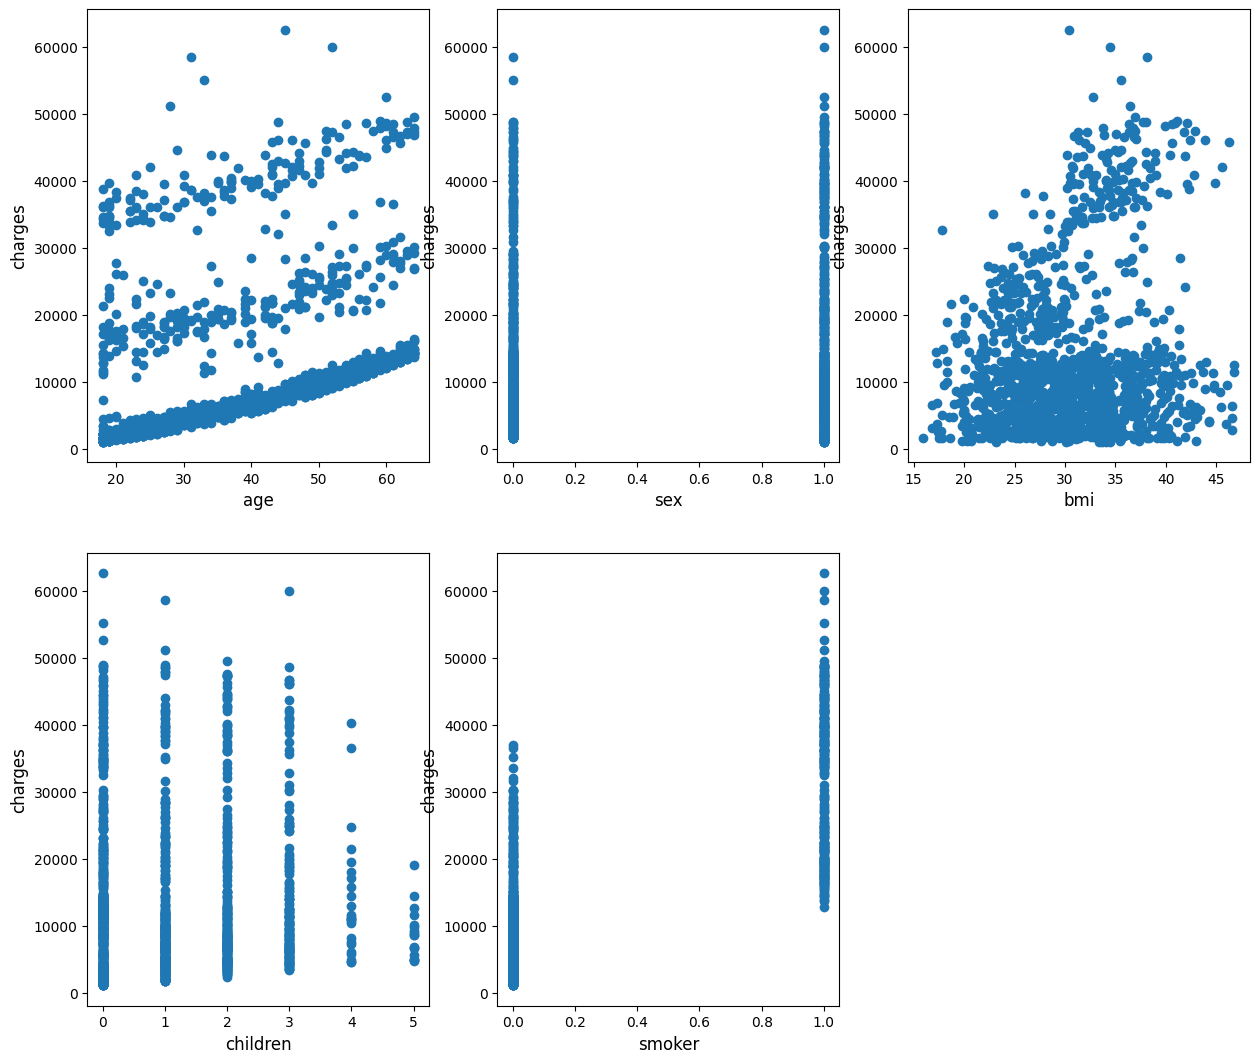

In [34]:
plt.figure(figsize=(15,20))
plotnum=1
for columns in x:
    if plotnum<=6:
        plt.subplot(3,3,plotnum)
        plt.scatter(x[columns],y)
        plt.xlabel(columns, fontsize=12)
        plt.ylabel('charges', fontsize=12)
        plotnum+=1
plt.show()


#### Plot shows all the features are having relationship with Label, except for 'region' and 'sex'

### Features relationship with Features

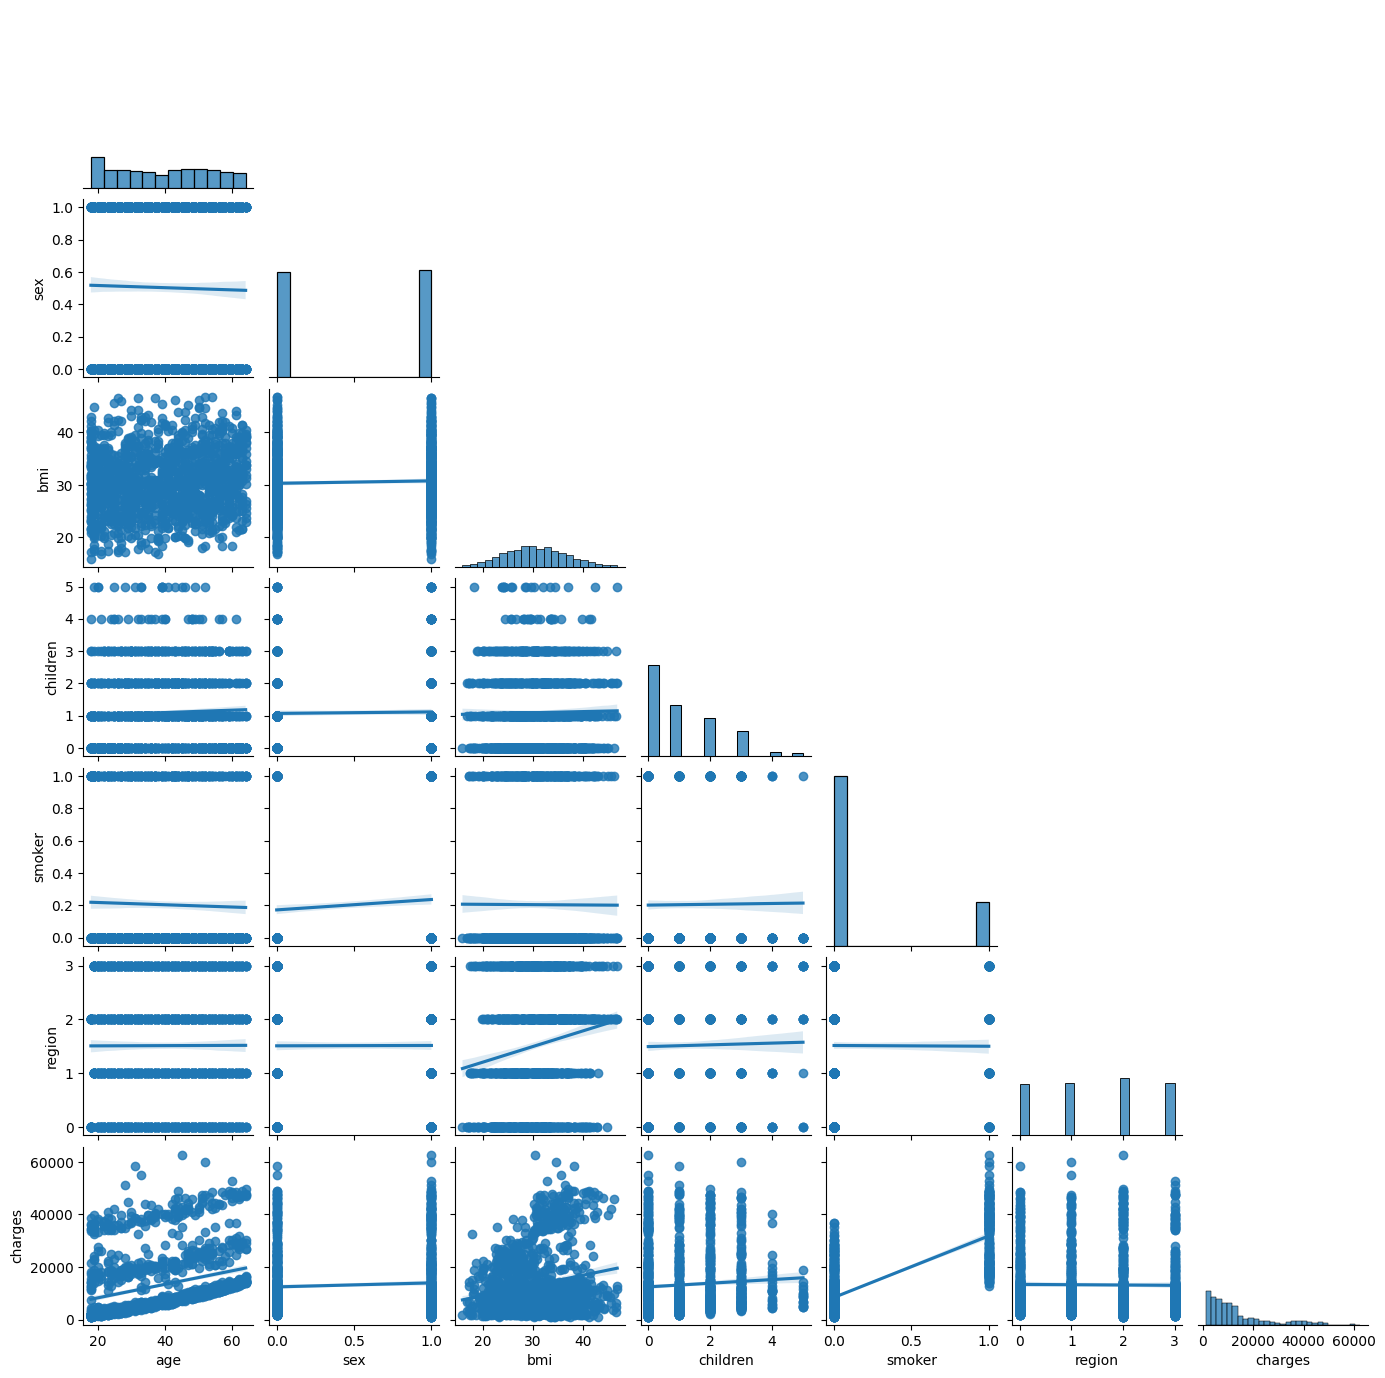

In [35]:
sns.pairplot(data=data,kind='reg',corner=True, height=2, aspect=1.)


#### 'region' is not showing good relationship with any feature and label as well

In [36]:
# check for corelation of 'region' column with other columns
cor=data.corr()
print('Co-relation of "region", with other columns in % :')
cor.region * 100

Co-relation of "region", with other columns in % :


age           0.280636
sex           0.296274
bmi          15.584683
children      1.764180
smoker       -0.518077
region      100.000000
charges      -1.072981
Name: region, dtype: float64

### 'region' column is having very Weak Relation ship with lable so we can dorp this column

In [37]:
# check for corelation of 'sex' column with other columns
cor=data.corr()
print('Co-relation of "sex", with other columns in % :')
cor.sex * 100

Co-relation of "sex", with other columns in % :


age          -1.914290
sex         100.000000
bmi           3.995791
children      1.928148
smoker        7.985355
region        0.296274
charges       6.339444
Name: sex, dtype: float64

#### since 'sex' column is having around 6% co-relation with lable so we will not drop it

##  # Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#### Train Test split

In [39]:
X=data.drop(['charges'], axis=1)
y=data['charges']
X.shape

(1329, 6)

In [40]:
y.shape

(1329,)

In [41]:


maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_y_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print('Max R2 Score is : ', maxacc, " And at Random State :  ", maxrs)


Max R2 Score is :  0.8158497005715959  And at Random State :   75


#### So we are getting R2 Score = 81% with Random state at 75

In [42]:
# spliting train test on Random stat = maxrs
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=maxrs)
y_test

433     12638.19500
545     23807.24060
980     25517.11363
265     46151.12450
1275    10959.33000
           ...     
630     10085.84600
38      39774.27630
248      1832.09400
930      2927.06470
1310     6940.90985
Name: charges, Length: 333, dtype: float64

#### # Linear Regression Model

In [43]:
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred=ln.predict(x_test)
ln_acc=r2_score(y_test,ln_pred)
ln_pred_train=ln.predict(x_train)
ln_acc_train=r2_score(y_train,ln_pred_train)

print("R2 score - Train in % : ",ln_acc_train*100)
print("R2 score - Test in % : ",ln_acc*100)
print("MAE : ",mean_absolute_error(y_test, ln_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, ln_pred)))


R2 score - Train in % :  72.31334493221019
R2 score - Test in % :  81.5849700571596
MAE :  4021.731266448861
RMSE :  5441.971275952516


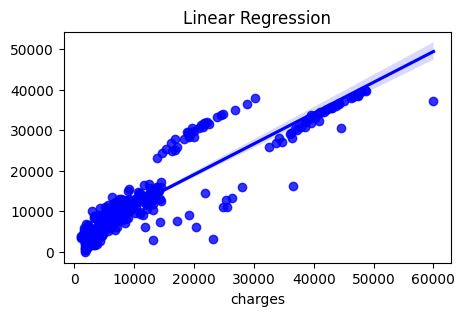

In [44]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=ln_pred, color='blue')
plt.title('Linear Regression')
plt.show()

#### # Random Forest Regressor

In [45]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc=r2_score(y_test,rf_pred)
rf_pred_train=rf.predict(x_train)
rf_acc_train=r2_score(y_train,rf_pred_train)

print("R2 score - Train in % : ",rf_acc_train*100)
print("R2 score - Test in % : ",rf_acc*100)
print("MAE : ",mean_absolute_error(y_test, rf_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, rf_pred)))



R2 score - Train in % :  97.15276150667484
R2 score - Test in % :  89.04562210780881
MAE :  2484.718299192319
RMSE :  4197.240838175806


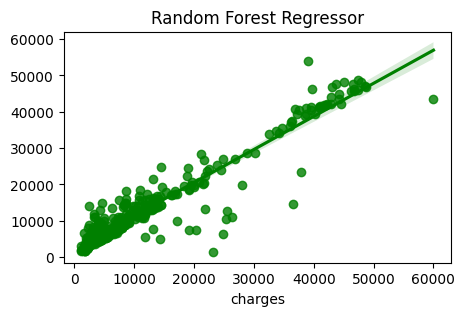

In [71]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=rf_pred, color='g')
plt.title('Random Forest Regressor')
plt.show()

#### # Decision Tree Regressor

In [47]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc=r2_score(y_test,dt_pred)
dt_pred_train=dt.predict(x_train)
dt_acc_train=r2_score(y_train,dt_pred_train)

print("R2 score - Train in % : ",dt_acc_train*100)
print("R2 score - Test in % : ",dt_acc*100)
print("MAE : ",mean_absolute_error(y_test, dt_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, dt_pred)))


R2 score - Train in % :  99.81005954202502
R2 score - Test in % :  74.90930374952565
MAE :  2998.324846081081
RMSE :  6352.232521081475


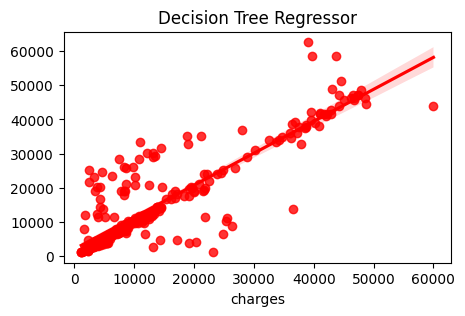

In [72]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=dt_pred, color='r')
plt.title('Decision Tree Regressor')
plt.show()

#### # Gradient Boosting Regressor

In [49]:
gt=GradientBoostingRegressor()
gt.fit(x_train,y_train)
gt_pred=gt.predict(x_test)
gt_acc=r2_score(y_test,gt_pred)
gt_pred_train=gt.predict(x_train)
gt_acc_train=r2_score(y_train,gt_pred_train)

print("R2 score - Train in % : ",gt_acc_train*100)
print("R2 score - Test in % : ",gt_acc*100)
print("MAE : ",mean_absolute_error(y_test, gt_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, gt_pred)))


R2 score - Train in % :  88.51331834953467
R2 score - Test in % :  92.16387543685858
MAE :  2194.043773559325
RMSE :  3549.9374098143253


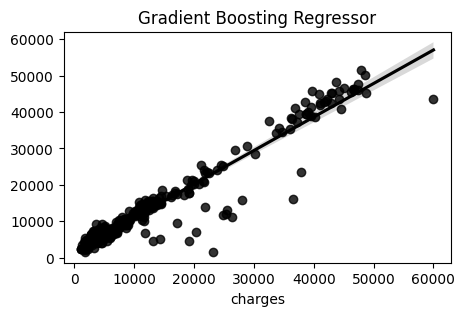

In [73]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=gt_pred, color='black')
plt.title('Gradient Boosting Regressor')
plt.show()

#### # K Neighbors Regressor

In [51]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_acc=r2_score(y_test,knn_pred)
knn_pred_train=knn.predict(x_train)
knn_acc_train=r2_score(y_train,knn_pred_train)

print("R2 score - Train in % : ",knn_acc_train*100)
print("R2 score - Test in % : ",knn_acc*100)
print("MAE : ",mean_absolute_error(y_test, knn_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, knn_pred)))

R2 score - Train in % :  39.23208180041616
R2 score - Test in % :  18.68943541677053
MAE :  8231.87942023904
RMSE :  11435.193523006514


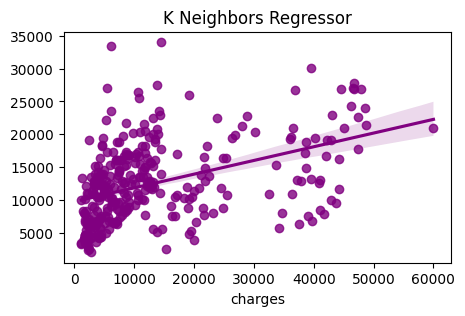

In [74]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=knn_pred, color='purple')
plt.title('K Neighbors Regressor')
plt.show()

#### # Lasso

In [53]:
las=Lasso()
las.fit(x_train,y_train)
las_pred_train=las.predict(x_train)
las_pred=las.predict(x_test)
las_acc_train=r2_score(y_train,las_pred_train)
las_acc=r2_score(y_test,las_pred)

print("R2 score - Train in % : ",las_acc_train*100)
print("R2 score - Test in % : ",las_acc*100)
print("MAE : ",mean_absolute_error(y_test, las_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, las_pred)))

R2 score - Train in % :  72.31333564413299
R2 score - Test in % :  81.58372402879472
MAE :  4022.2638600209502
RMSE :  5442.155384691175


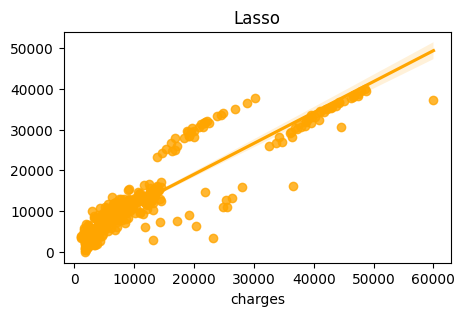

In [75]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=las_pred, color='orange')
plt.title('Lasso')
plt.show()

#### # Ridge

In [55]:
rid=Ridge()
rid.fit(x_train,y_train)
rid_pred_train=rid.predict(x_train)
rid_pred=rid.predict(x_test)
rid_acc_train=r2_score(y_train,rid_pred_train)
rid_acc=r2_score(y_test,rid_pred)

print("R2 score - Train in % : ",rid_acc_train*100)
print("R2 score - Test in % : ",rid_acc*100)
print("MAE : ",mean_absolute_error(y_test, rid_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, rid_pred)))

R2 score - Train in % :  72.31088291726115
R2 score - Test in % :  81.53226253757644
MAE :  4037.696828382182
RMSE :  5449.753719380262


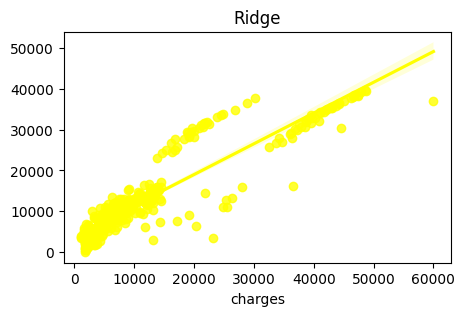

In [76]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=rid_pred, color='yellow')
plt.title('Ridge')
plt.show()

#### # SVR

In [57]:
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_train=svr.predict(x_train)
svr_pred=svr.predict(x_test)
svr_acc_train=r2_score(y_train,svr_pred_train)
svr_acc=r2_score(y_test,svr_pred)

print("R2 score - Train in % : ",svr_acc_train*100)
print("R2 score - Test in % : ",svr_acc*100)
print("MAE : ",mean_absolute_error(y_test, svr_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, svr_pred)))

R2 score - Train in % :  -9.412554631642166
R2 score - Test in % :  -7.611089580345687
MAE :  8656.445991106824
RMSE :  13155.233008765685


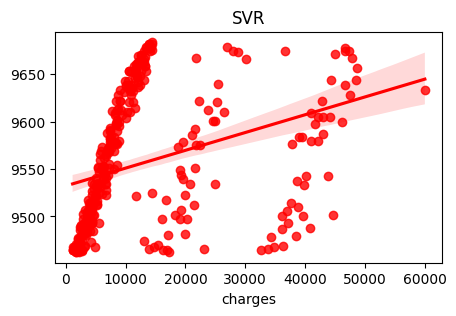

In [77]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=svr_pred, color='r')
plt.title('SVR')
plt.show()

#### # Extra Trees Regressor

In [59]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_train=et.predict(x_train)
et_pred=et.predict(x_test)
et_acc_train=r2_score(y_train,et_pred_train)
et_acc=r2_score(y_test,et_pred)

print("R2 score - Train in % : ",et_acc_train*100)
print("R2 score - Test in % : ",et_acc*100)
print("MAE : ",mean_absolute_error(y_test, et_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, et_pred)))

R2 score - Train in % :  99.81005954202502
R2 score - Test in % :  87.48014856956361
MAE :  2480.5298280156753
RMSE :  4487.139981777629


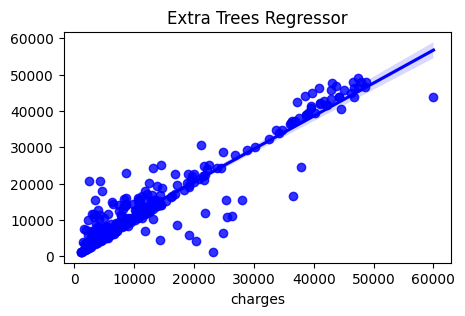

In [78]:
plt.figure(figsize=(5,3))
sns.regplot(x=y_test, y=et_pred, color='blue')
plt.title('Extra Trees Regressor')
plt.show()

### So we are having min error and good accuracy score for Gradient Boosting Regressor and Extra Trees Regresor



#### Gradient boosting Regressor
R2 score - Train in % :  88.51331834953467  ,  
R2 score - Test in % :  92.16387543685858  ,  
MAE :  2194.043773559325  ,  
RMSE :  3549.9374098143253  ,  

#### Extra Trees Regressor
R2 score - Train in % :  99.81005954202502  ,  
R2 score - Test in % :  87.48014856956361  ,  
MAE :  2480.5298280156753  ,  
RMSE :  4487.139981777629  ,  


### # lets proceed for cross validation scores for all the models

In [61]:
from sklearn.model_selection import cross_val_score

#### linear Regression

In [62]:
ln_score=cross_val_score(ln,X,y,cv=5,scoring='r2')
print(ln_score)
print(ln_score.mean())
print('difference of R2 score and CV score is  :   ',(ln_acc - ln_score.mean() )*100 )


[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
0.7465696971497524
difference of R2 score and CV score is  :    6.928000342184348


#### Random Forest Regressor

In [63]:
rf_score=cross_val_score(rf,X,y,cv=5,scoring='r2')
print(rf_score)
print(rf_score.mean())
print('difference of R2 score and CV score is  :   ',(rf_acc - rf_score.mean() )*100 )


[0.85173068 0.77133582 0.86226116 0.82286297 0.85159567]
0.8319572622666216
difference of R2 score and CV score is  :    5.849895881146649


#### Decision Tree Regressor

In [64]:
dt_score=cross_val_score(dt,X,y,cv=5,scoring='r2')
print(dt_score)
print(dt_score.mean())
print('difference of R2 score and CV score is  :   ',(dt_acc - dt_score.mean() )*100 )


[0.72368638 0.63049173 0.70866437 0.7057897  0.69380421]
0.6924872793547818
difference of R2 score and CV score is  :    5.660575814047464


#### Gradient Boosting Regressor

In [65]:
gt_score=cross_val_score(gt,X,y,cv=5,scoring='r2')
print(gt_score)
print(gt_score.mean())
print('difference of R2 score and CV score is  :   ',(gt_acc - gt_score.mean() )*100 )


[0.87608301 0.79376657 0.88875957 0.84508821 0.86064646]
0.8528687652501737
difference of R2 score and CV score is  :    6.876998911841204


#### K Neighbor Regressor

In [66]:
knn_score=cross_val_score(knn,X,y,cv=5,scoring='r2')
print(knn_score)
print(knn_score.mean())
print('difference of R2 score and CV score is  :   ',(knn_acc - knn_score.mean() )*100 )


[0.14393455 0.04078142 0.05015717 0.14316609 0.17066538]
0.10974092006890401
difference of R2 score and CV score is  :    7.715343409880127


#### LASSO

In [67]:
las_score=cross_val_score(las,X,y,cv=5,scoring='r2')
print(las_score)
print(las_score.mean())
print('difference of R2 score and CV score is  :   ',(las_acc - las_score.mean() )*100 )


[0.76262715 0.71184495 0.7731203  0.72864126 0.7566464 ]
0.7465760133222379
difference of R2 score and CV score is  :    6.926122696570925


#### RIDGE

In [68]:
rid_score=cross_val_score(rid,X,y,cv=5,scoring='r2')
print(rid_score)
print(rid_score.mean())
print('difference of R2 score and CV score is  :   ',(rid_acc - rid_score.mean() )*100 )

[0.76269866 0.71210236 0.77259178 0.72901676 0.75633483]
0.7465488770967166
difference of R2 score and CV score is  :    6.8773748279047915


#### SVR

In [69]:
svr_score=cross_val_score(svr,X,y,cv=5,scoring='r2')
print(svr_score)
print(svr_score.mean())
print('difference of R2 score and CV score is  :   ',(svr_acc - svr_score.mean() )*100 )

[-0.11490934 -0.11788693 -0.07356416 -0.10055027 -0.11437121]
-0.10425638072707946
difference of R2 score and CV score is  :    2.8145484923622592


#### Extra Trees Regressor

In [70]:
et_score=cross_val_score(et,X,y,cv=5,scoring='r2')
print(et_score)
print(et_score.mean())
print('difference of R2 score and CV score is  :   ',(et_acc - et_score.mean() )*100 )

[0.836275   0.74415444 0.84758059 0.81043693 0.83990738]
0.8156708680744493
difference of R2 score and CV score is  :    5.9130617621186765


#### So finally we have two Algorithms from which we need to select one

#### 1. Gradient Boosting Regressor
R2 score - Train in % :  88.51331834953467  ,  
R2 score - Test in % :  92.16387543685858  ,  
MAE :  2194.043773559325  ,  
RMSE :  3549.9374098143253  ,   
CV Score : 0.8528687652501737  ,  
difference of R2 score and CV score is  :    6.87 %

#### 2. Extra Trees Regressor
R2 score - Train in % :  99.81005954202502  ,  
R2 score - Test in % :  87.48014856956361  ,  
MAE :  2480.5298280156753  ,  
RMSE :  4487.139981777629  ,  
CV Score : 0.8156708680744493  ,  
difference of R2 score and CV score is  :    5.91 %

### Finally we select Extra Tree Regressor for model building as it is having less difference in R2 Score and CV score

## # Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'criterion' : ['squared_error','absolute_error'],
       'random_state' : [75],
       'max_depth' : [None,5,10,15],
       'max_features': [1.0, 'sqrt', 'log2'],
       'n_estimators' : [10,20,30],
       'min_samples_split': [2, 5, 7],
        'min_samples_leaf' : [1, 2, 4],
        'n_jobs' : [-2,-1,1]}

In [ ]:
gscv=GridSearchCV(et,params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [0, 10, 28, 35, 323, 165]})

In [ ]:
gscv.best_score_

0.8243787192333596

In [ ]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 165}

In [82]:
final_model=ExtraTreesRegressor(criterion= 'absolute_error',
 max_depth= 10,
 max_features= 1.0,
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 50,
 n_jobs= -2,
 random_state= 165)
#final_model=ExtraTreesRegressor()
final_model.fit(x_train,y_train)
final_model_pred_train=final_model.predict(x_train)
final_model_pred=final_model.predict(x_test)
final_model_acc_train=r2_score(y_train,final_model_pred_train)
final_model_acc=r2_score(y_test,final_model_pred)

print("R2 score - Train in % : ",final_model_acc_train*100)
print("R2 score - Test in % : ",final_model_acc*100)
print("MAE : ",mean_absolute_error(y_test, final_model_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, final_model_pred)))

R2 score - Train in % :  87.56959750247898
R2 score - Test in % :  92.75904269849595
MAE :  1311.5288459513213
RMSE :  3412.4635699902506


In [87]:
#saving the model
import pickle
pickle.dump(final_model, open('Medical_Personal_insurance_cost.pkl', 'wb'))



In [88]:
load_model=pickle.load(open('Medical_Personal_insurance_cost.pkl', 'rb'))
final_result=load_model.score(x_test,y_test)
print('The Final Result is  :  ',final_result*100)

The Final Result is  :   92.75904269849595


In [183]:
compare=pd.DataFrame({'Predicted' : load_model.predict(x_test), 'Actual' : y_test})
compare

,Predicted,Actual
433,12973.849386,12638.19500
545,23438.047765,23807.24060
980,10626.797892,25517.11363
265,44716.239261,46151.12450
1275,11259.242923,10959.33000
...,...,...
630,10477.171632,10085.84600
38,40316.502015,39774.27630
248,1888.691542,1832.09400
930,3500.281500,2927.06470
